In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

path = kagglehub.dataset_download("laotse/credit-risk-dataset")

print("Path to dataset files:", path)

100%|██████████| 368k/368k [00:00<00:00, 61.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/laotse/credit-risk-dataset/versions/1


1. Прочитать данные

Index(['person_age', 'person_income', 'person_home_ownership',
'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
'loan_int_rate', 'loan_status', 'loan_percent_income',
'cb_person_default_on_file', 'cb_person_cred_hist_length'],
dtype='object')
1. person_age — возраст человека.
2. person_income — годовой доход человека.
3. person_home_ownership — статус владения жильем.
4. person_emp_length — стаж работы.
5. loan_intent — цель кредита.
6. loan_grade — оценка кредита, которая указывает уровень риска.
7. loan_amnt — сумма кредита.
8. loan_int_rate — процентная ставка по кредиту.
9. loan_status — статус кредита (Целевой столбец для классификации)
10. loan_percent_income — процент от дохода, который составляет кредит.
11. cb_person_default_on_file — информация о наличии дефолта в кредитной истории (Y - был дефолт, N - нет дефолта).
12. cb_person_cred_hist_length — длина кредитной истории.

In [ ]:
file_path = "credit_risk_dataset.csv"
df = pd.read_csv(file_path)
print(df.head())

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


In [ ]:
print(df.head(5))  # первые 5 строк

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


2. Визуализация данных и выделение основных характеристик.

In [ ]:
# Основные статистические характеристики
stats = df.describe()
print(stats)


         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%   

<Axes: ylabel='person_income'>

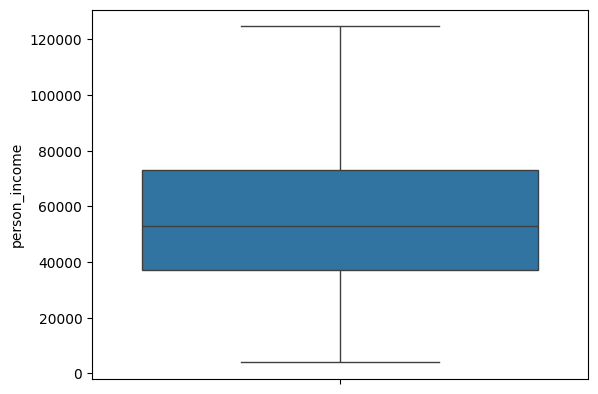

In [ ]:
df['person_income'].quantile(0.93)
df = df[df['person_income'] <= 124755]
sns.boxplot(df['person_income'])

<class 'pandas.core.frame.DataFrame'>
Количество строк до удаления выбросов: 30300
Количество строк после удаления выбросов: 29989


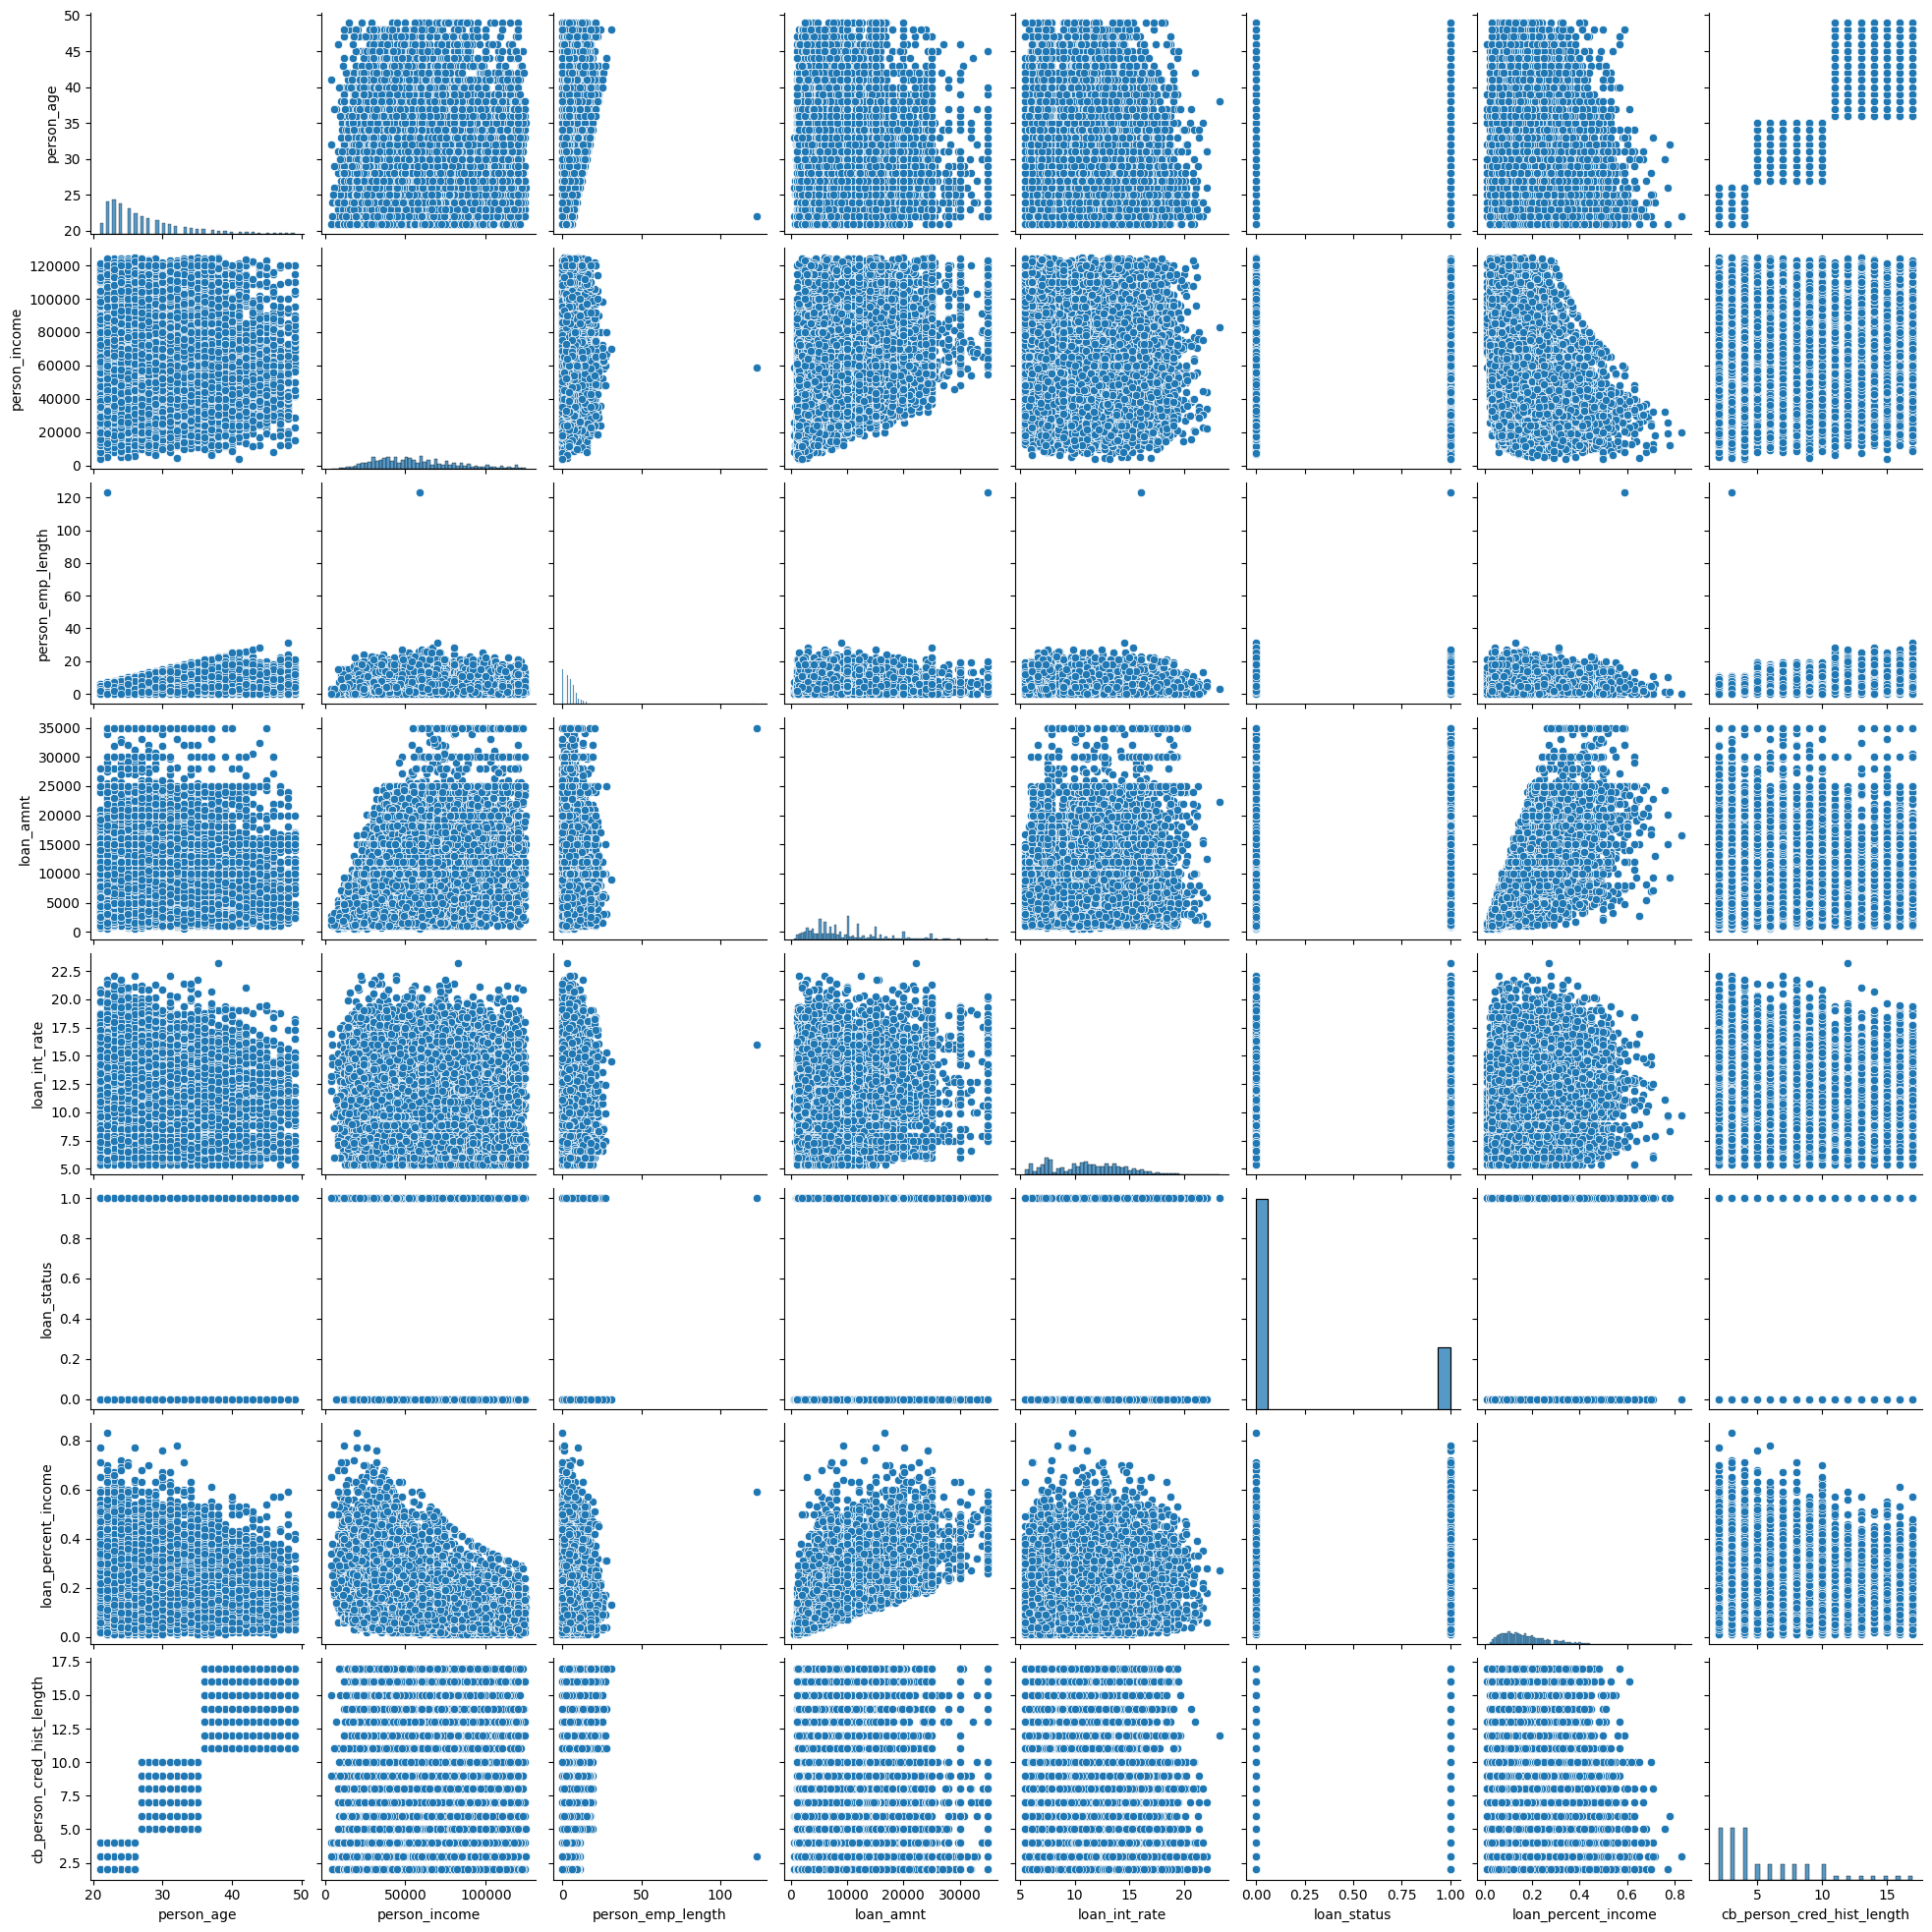

In [ ]:
# Проверка типа переменной df
print(type(df))  # Должно вывести <class 'pandas.core.frame.DataFrame'>

# Если df — это DataFrame, продолжаем
# Определим пороговые значения квантилей (1% и 99%) для person_age
lower_quantile = 0.01
upper_quantile = 0.99

# Находим значения квантилей для поля person_age
age_lower_bound = df["person_age"].quantile(lower_quantile)
age_upper_bound = df["person_age"].quantile(upper_quantile)

# Отфильтруем выбросы по полю person_age
df_no_outliers = df[(df["person_age"] >= age_lower_bound) & (df["person_age"] <= age_upper_bound)]

# Проверим, сколько строк осталось после удаления выбросов
print(f"Количество строк до удаления выбросов: {df.shape[0]}")
print(f"Количество строк после удаления выбросов: {df_no_outliers.shape[0]}")
df = df_no_outliers
sns.pairplot(df)

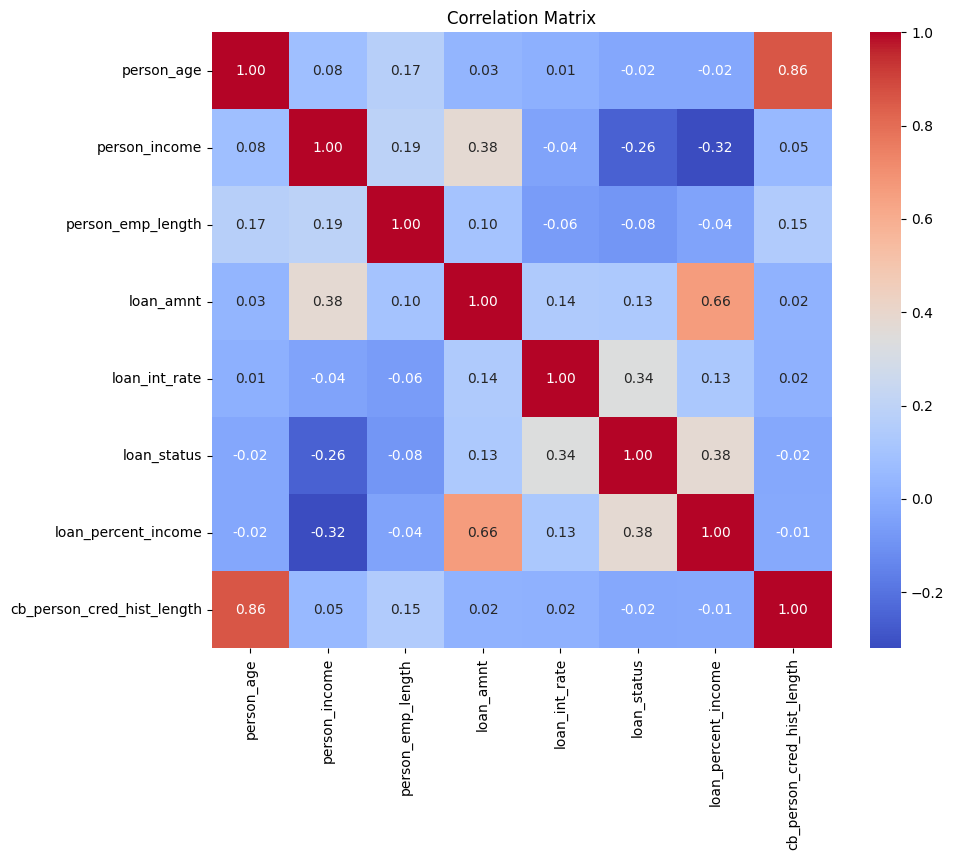

In [ ]:

numeric_df = df.select_dtypes(include=["number"])

correlation_matrix = numeric_df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


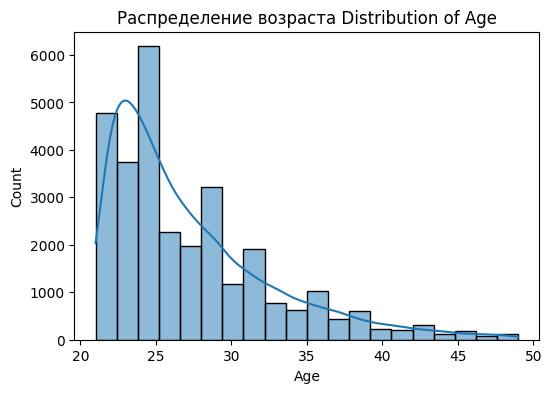

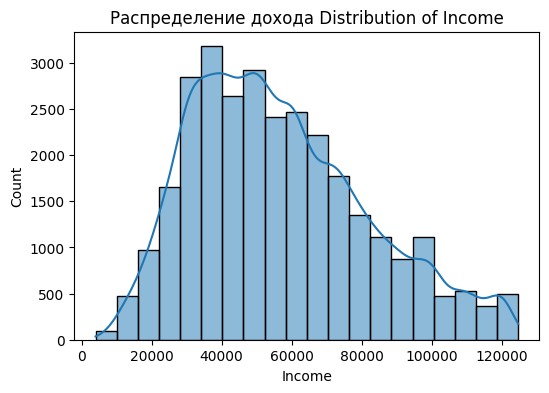

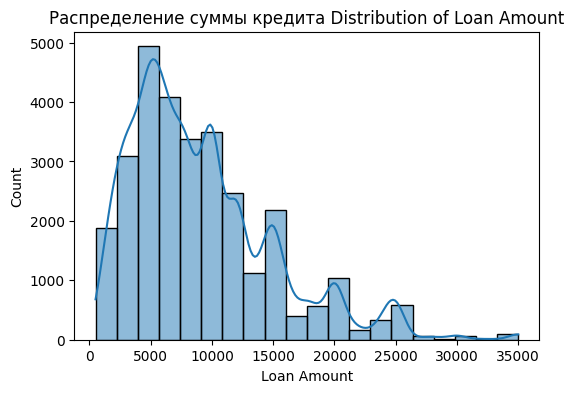

In [ ]:

plt.figure(figsize=(6, 4))
sns.histplot(df['person_age'], bins=20, kde=True)
plt.title("Распределение возраста Distribution of Age")
plt.xlabel("Age")
plt.show()


plt.figure(figsize=(6, 4))
sns.histplot(df['person_income'], bins=20, kde=True)
plt.title("Распределение дохода Distribution of Income")
plt.xlabel("Income")
plt.show()


plt.figure(figsize=(6, 4))
sns.histplot(df['loan_amnt'], bins=20, kde=True)
plt.title("Распределение суммы кредита Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.show()


3. Работа с пропущенными значениями.

In [ ]:
# Просмотрим количество пропущенных значений в каждом столбце
print(df.isna().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              869
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2865
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [ ]:
# Обработаем пропущенные значения с помощью медиан
for column in df.select_dtypes(include=["number"]).columns:
    df[column].fillna(df[column].median(), inplace=True)

# Проверка, что пропущенные значения заполнены
print(df.isna().sum())


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


<ipython-input-10-defcc24a5ac9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


4. Обработка категориальных признаков.

In [ ]:
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32290,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000,6.62,0,0.04,N,15
32293,38,110000,MORTGAGE,5.0,MEDICAL,B,16000,11.99,0,0.15,N,13
32294,36,92000,MORTGAGE,18.0,DEBTCONSOLIDATION,A,4000,7.29,0,0.04,N,13
32295,42,101000,MORTGAGE,6.0,DEBTCONSOLIDATION,F,25000,16.15,1,0.25,Y,14
32296,40,52000,RENT,2.0,EDUCATION,F,15000,18.62,1,0.29,Y,16


In [ ]:
df = pd.get_dummies(df, columns=['person_home_ownership'])
df.tail()

,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
32290,37,90000,11.0,DEBTCONSOLIDATION,A,4000,6.62,0,0.04,N,15,True,False,False,False
32293,38,110000,5.0,MEDICAL,B,16000,11.99,0,0.15,N,13,True,False,False,False
32294,36,92000,18.0,DEBTCONSOLIDATION,A,4000,7.29,0,0.04,N,13,True,False,False,False
32295,42,101000,6.0,DEBTCONSOLIDATION,F,25000,16.15,1,0.25,Y,14,True,False,False,False
32296,40,52000,2.0,EDUCATION,F,15000,18.62,1,0.29,Y,16,False,False,False,True


In [ ]:
df = pd.get_dummies(df, columns=['loan_intent'])
df = pd.get_dummies(df, columns=['loan_grade'])
df = pd.get_dummies(df, columns=['cb_person_default_on_file'])

In [ ]:
df.tail()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
32290,37,90000,11.0,4000,6.62,0,0.04,15,True,False,...,False,True,False,False,False,False,False,False,True,False
32293,38,110000,5.0,16000,11.99,0,0.15,13,True,False,...,False,False,True,False,False,False,False,False,True,False
32294,36,92000,18.0,4000,7.29,0,0.04,13,True,False,...,False,True,False,False,False,False,False,False,True,False
32295,42,101000,6.0,25000,16.15,1,0.25,14,True,False,...,False,False,False,False,False,False,True,False,False,True
32296,40,52000,2.0,15000,18.62,1,0.29,16,False,False,...,False,False,False,False,False,False,True,False,False,True


5. Нормализация.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
numeric_cols = df.select_dtypes(include=["number"]).columns

Проведем нормализацию масштабированием в диапозоне [0,1] и посмотрим результат.

In [ ]:
min_max_scaler = MinMaxScaler()
df[numeric_cols] = min_max_scaler.fit_transform(df[numeric_cols])
print(df.head())

   person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0    0.035714       0.455577           1.000000   1.000000       0.595506   
1    0.000000       0.046386           0.040650   0.014493       0.321348   
2    0.142857       0.046386           0.008130   0.144928       0.418539   
3    0.071429       0.509418           0.032520   1.000000       0.551124   
4    0.107143       0.417474           0.065041   1.000000       0.497191   

   loan_status  loan_percent_income  cb_person_cred_hist_length  \
0          1.0             0.707317                    0.066667   
1          0.0             0.109756                    0.000000   
2          1.0             0.682927                    0.066667   
3          1.0             0.634146                    0.000000   
4          1.0             0.658537                    0.133333   

   person_home_ownership_MORTGAGE  person_home_ownership_OTHER  ...  \
0                           False                        False 

6. Разбиение данных на обучаюшую и тестовую выборки.


Для обучения модели предсказанию статуса кредита (loan_status) целесообразно использовать все вышеуказанные признаки, кроме самой целевой переменной loan_status. В итоговую выборку войдут:

- person_age
- person_income
- person_home_ownership
- person_emp_length
- loan_intent
- loan_grade
- loan_amnt
- loan_int_rate
- loan_percent_income
- cb_person_default_on_file
- cb_person_cred_hist_length

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['loan_status'])
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")

Размер обучающей выборки: 22491
Размер тестовой выборки: 7498


7. Запуск классификатора ближайших соседей.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.93      5833
         1.0       0.88      0.60      0.72      1665

    accuracy                           0.89      7498
   macro avg       0.89      0.79      0.83      7498
weighted avg       0.89      0.89      0.89      7498



Размер обучающей выборки: (22491, 26)
Размер тестовой выборки: (7498, 26)
Точность (Accuracy) на тестовой выборке: 0.8938
F1 score на тестовой выборке: 0.7161
Матрица ошибок:
[[5698  135]
 [ 661 1004]]


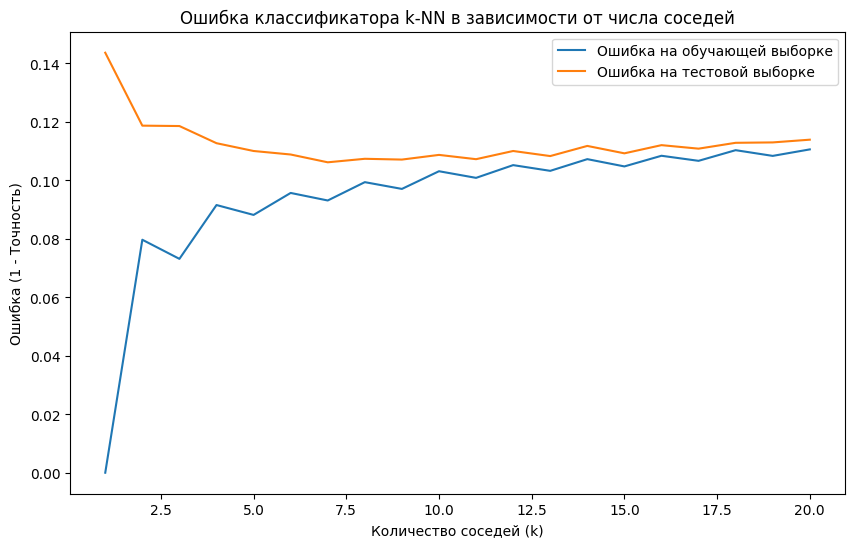

Оптимальное количество соседей: 7


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Подготовка данных
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

# Определение оптимального k и создание модели
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# Предсказания и метрики для тестовой выборки
y_test_predict = knn_optimal.predict(X_test)

# Accuracy и F1 score для тестовой выборки
accuracy = accuracy_score(y_test, y_test_predict)
f1 = f1_score(y_test, y_test_predict)

print(f"Точность (Accuracy) на тестовой выборке: {accuracy:.4f}")
print(f"F1 score на тестовой выборке: {f1:.4f}")

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_test_predict)
print("Матрица ошибок:")
print(conf_matrix)

# График ошибок в зависимости от числа соседей
neighbors_range = range(1, 21)
train_errors = []
test_errors = []

# Поиск оптимального k
for k in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Ошибки на обучающей и тестовой выборках
    train_accuracy = accuracy_score(y_train, knn.predict(X_train))
    train_errors.append(1 - train_accuracy)

    test_accuracy = accuracy_score(y_test, knn.predict(X_test))
    test_errors.append(1 - test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, train_errors, label="Ошибка на обучающей выборке")
plt.plot(neighbors_range, test_errors, label="Ошибка на тестовой выборке")
plt.xlabel("Количество соседей (k)")
plt.ylabel("Ошибка (1 - Точность)")
plt.legend()
plt.title("Ошибка классификатора k-NN в зависимости от числа соседей")
plt.show()

# Оптимальное значение k
optimal_k = neighbors_range[test_errors.index(min(test_errors))]
print("Оптимальное количество соседей:", optimal_k)


Выводы: По проведенным запускам модели и полученным метрикам видим, что модель работает коррректно и показывает отличные результаты в f1 и accuracy. Построив матрицу ошибок видим, 5698 предсказаний были верными для класса "кредит погашен", в то время как 135 оказались неверными. В отношении класса "кредит не погашен", 661 предсказаний оказались ошибочными, а 1004 — правильными. Оптимальным значением гиперпараметра k является 7, так как оно минимизирует ошибку на тестовой выборке.